# 30년 이상된 집
- 30년이 지나면 재건축 가능 -> 집값이 상승할 수 있다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/preprocessed/15_buy_advantage.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_86184/1589900297.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/15_buy_advantage.csv')


In [3]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [4]:
df['건물나이'] = df['계약년'] - df['건축년도']
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,아파트 인허가,미분양,거래량,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31


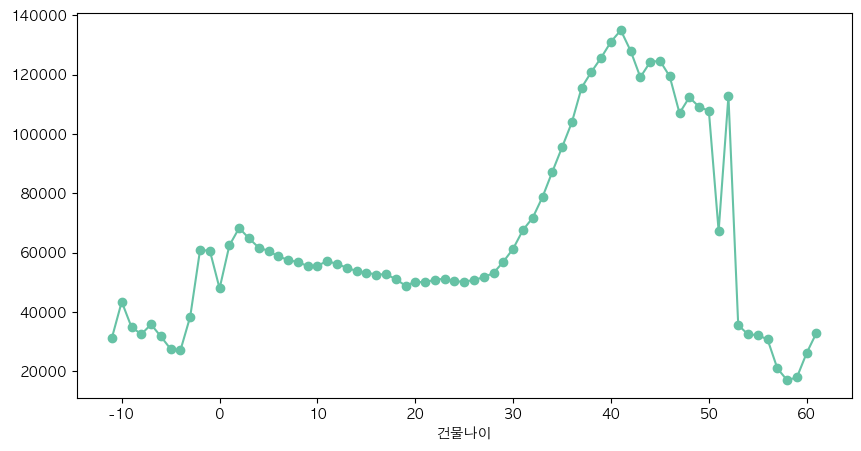

In [25]:
tmp = df.groupby('건물나이')['target'].mean()

plt.figure(figsize=(10, 5))
tmp.plot(kind='line', marker='o', linestyle='-', colormap='Set2')
plt.show()

In [15]:
df['30년이상50년이하'] = df['건물나이'].apply(lambda x: 1 if (30<=x) and (x<=50) else 0)

In [18]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,미분양,거래량,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,1081.0,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,1081.0,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0,9,0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,976.0,6716.0,1.0,중랑구,신내동,99.123,2.963517e+06,46.0,9,0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,914.0,6396.0,1.0,중랑구,신내동,99.328,2.963517e+06,41.4,9,0


In [22]:
df[['건축년도', '계약년', '건물나이', '30년이상50년이하']].iloc[:30]

,건축년도,계약년,건물나이,30년이상50년이하
0,1987,2017,30,1
1,1987,2017,30,1
2,1987,2017,30,1
3,1987,2018,31,1
4,1987,2018,31,1
5,1987,2018,31,1
6,1987,2018,31,1
7,1987,2018,31,1
8,1987,2018,31,1
9,1987,2018,31,1


In [1]:
df.to_csv('../data/preprocessed/16_over_30_under_50_years.csv', index=False)

NameError: name 'df' is not defined

# corr 확인

In [3]:
df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_89610/1231300638.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/16_over_30_under_50_years.csv')


In [4]:
numeric_df = df.select_dtypes(['int64', 'float64'])

In [5]:
corr_matrix = numeric_df.corr()

In [6]:
corr_matrix

,본번,부번,전용면적,계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,지가지수,아파트 인허가,미분양,거래량,건설사 랭킹,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하
본번,1.000000,-0.045970,-0.014620,0.027455,0.000802,0.028459,0.157996,0.025169,-0.155362,-0.134667,...,0.025874,0.001792,-0.016276,0.012281,-0.029707,0.043335,-0.059128,0.018887,-0.141827,-0.116676
부번,-0.045970,1.000000,0.010696,-0.000698,-0.000896,-0.029693,0.002408,-0.023127,0.017665,-0.022827,...,0.006229,-0.001457,-0.006982,-0.005057,0.023922,0.008400,0.039405,0.000257,-0.002640,0.017543
전용면적,-0.014620,0.010696,1.000000,0.026261,0.003607,0.103204,0.076168,-0.018443,0.043693,0.013618,...,-0.003381,0.008245,-0.001044,0.023852,-0.064684,-0.056498,0.175835,0.016611,-0.062689,0.007362
계약년월,0.027455,-0.000698,0.026261,1.000000,0.005716,0.051219,0.167531,0.934141,-0.024570,-0.000560,...,0.902130,0.060915,-0.548284,0.122476,-0.051487,0.847038,0.368328,0.456746,0.277888,0.167954
계약일,0.000802,-0.000896,0.003607,0.005716,1.000000,0.001629,0.002657,-0.014993,0.000205,0.000309,...,0.001282,0.008236,0.002946,-0.039830,-0.001811,0.000049,0.003266,-0.019243,-0.000028,0.002593
층,0.028459,-0.029693,0.103204,0.051219,0.001629,1.000000,0.191310,0.053111,0.001503,-0.055487,...,0.045940,0.005970,-0.018733,-0.002682,-0.086482,0.036710,0.052221,0.013359,-0.163832,-0.135669
건축년도,0.157996,0.002408,0.076168,0.167531,0.002657,0.191310,1.000000,0.151370,-0.115067,-0.109098,...,0.168097,0.007932,-0.083642,0.003850,-0.181146,0.172401,0.041564,0.063016,-0.900476,-0.572122
해제사유발생일,0.025169,-0.023127,-0.018443,0.934141,-0.014993,0.053111,0.151370,1.000000,-0.114538,0.054033,...,0.932249,0.087028,0.791590,-0.730311,-0.041711,0.841939,0.234087,-0.797639,-0.060838,-0.016282
단지소개기존clob,-0.155362,0.017665,0.043693,-0.024570,0.000205,0.001503,-0.115067,-0.114538,1.000000,-0.039940,...,-0.018398,0.001600,0.010115,-0.008724,0.048557,-0.031732,0.003866,-0.011625,0.098578,0.032572
k-전체동수,-0.134667,-0.022827,0.013618,-0.000560,0.000309,-0.055487,-0.109098,0.054033,-0.039940,1.000000,...,-0.007441,0.004970,0.031558,-0.031486,-0.163084,-0.072005,0.188474,-0.039552,0.108617,0.223624


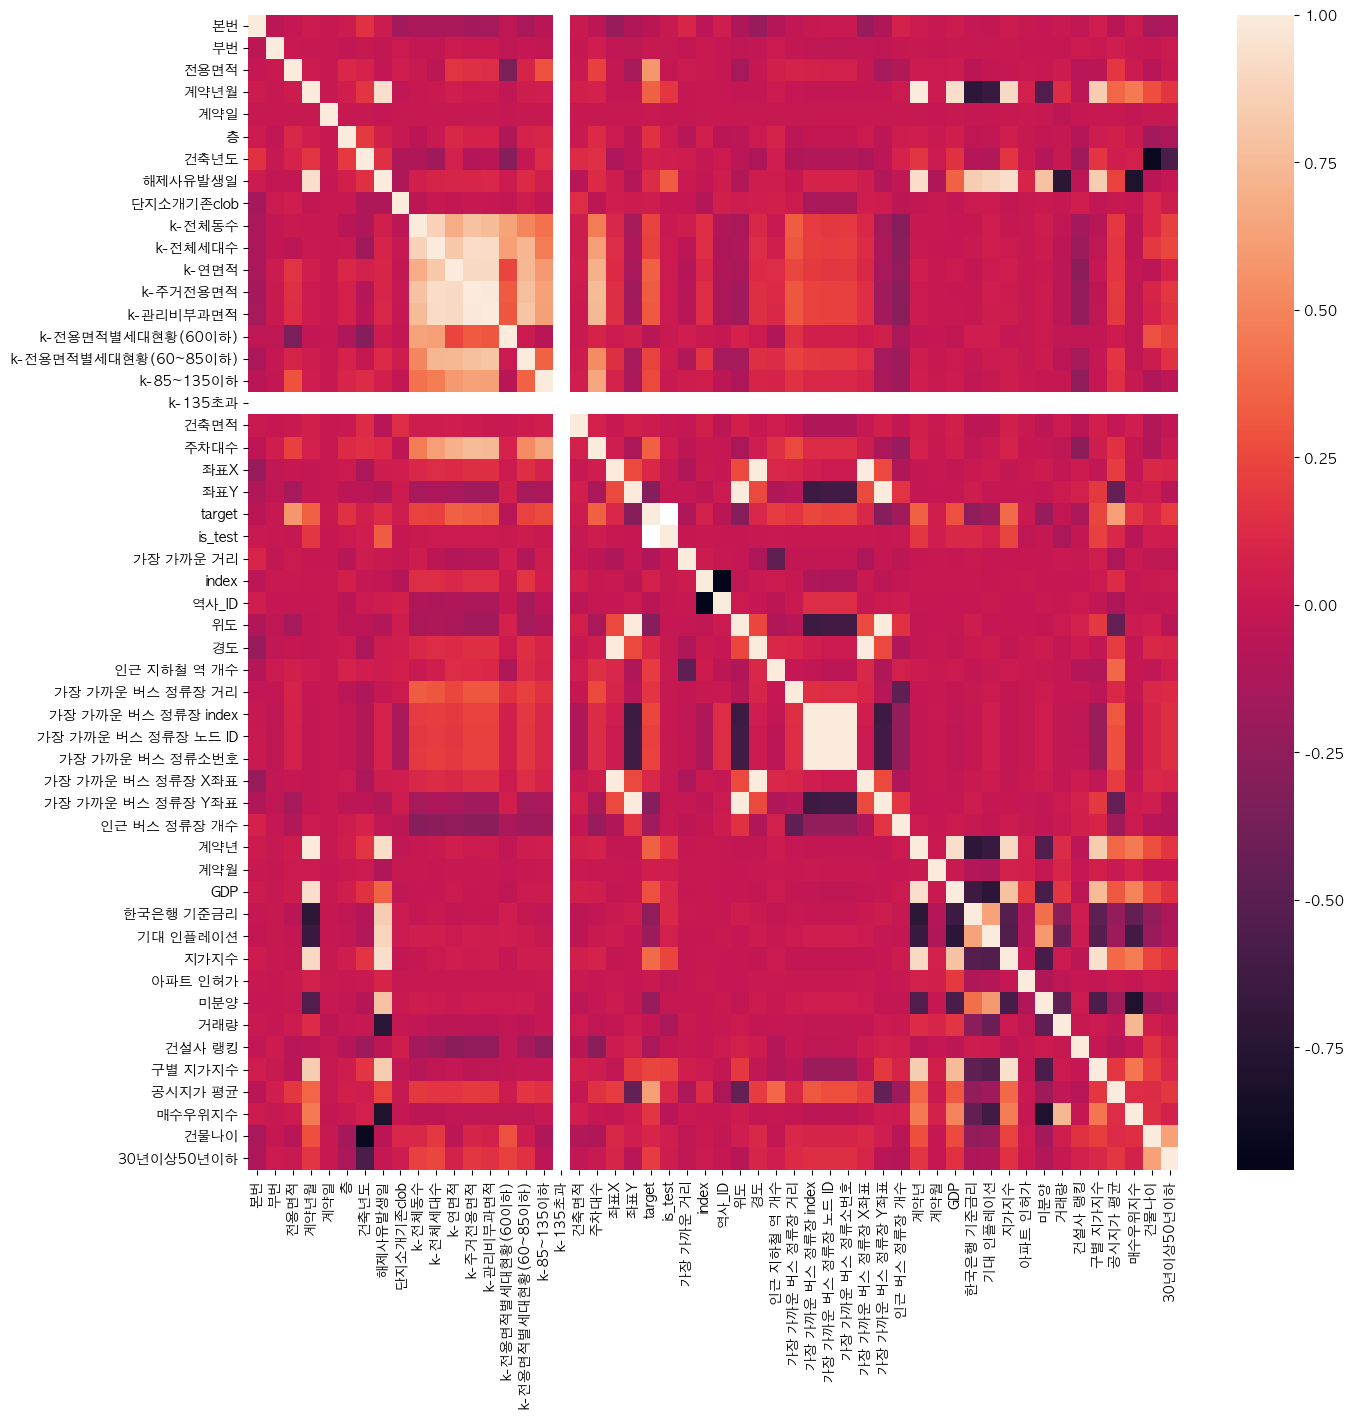

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)
plt.show()

In [11]:
corr_matrix = numeric_df[['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리', '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하']].corr()

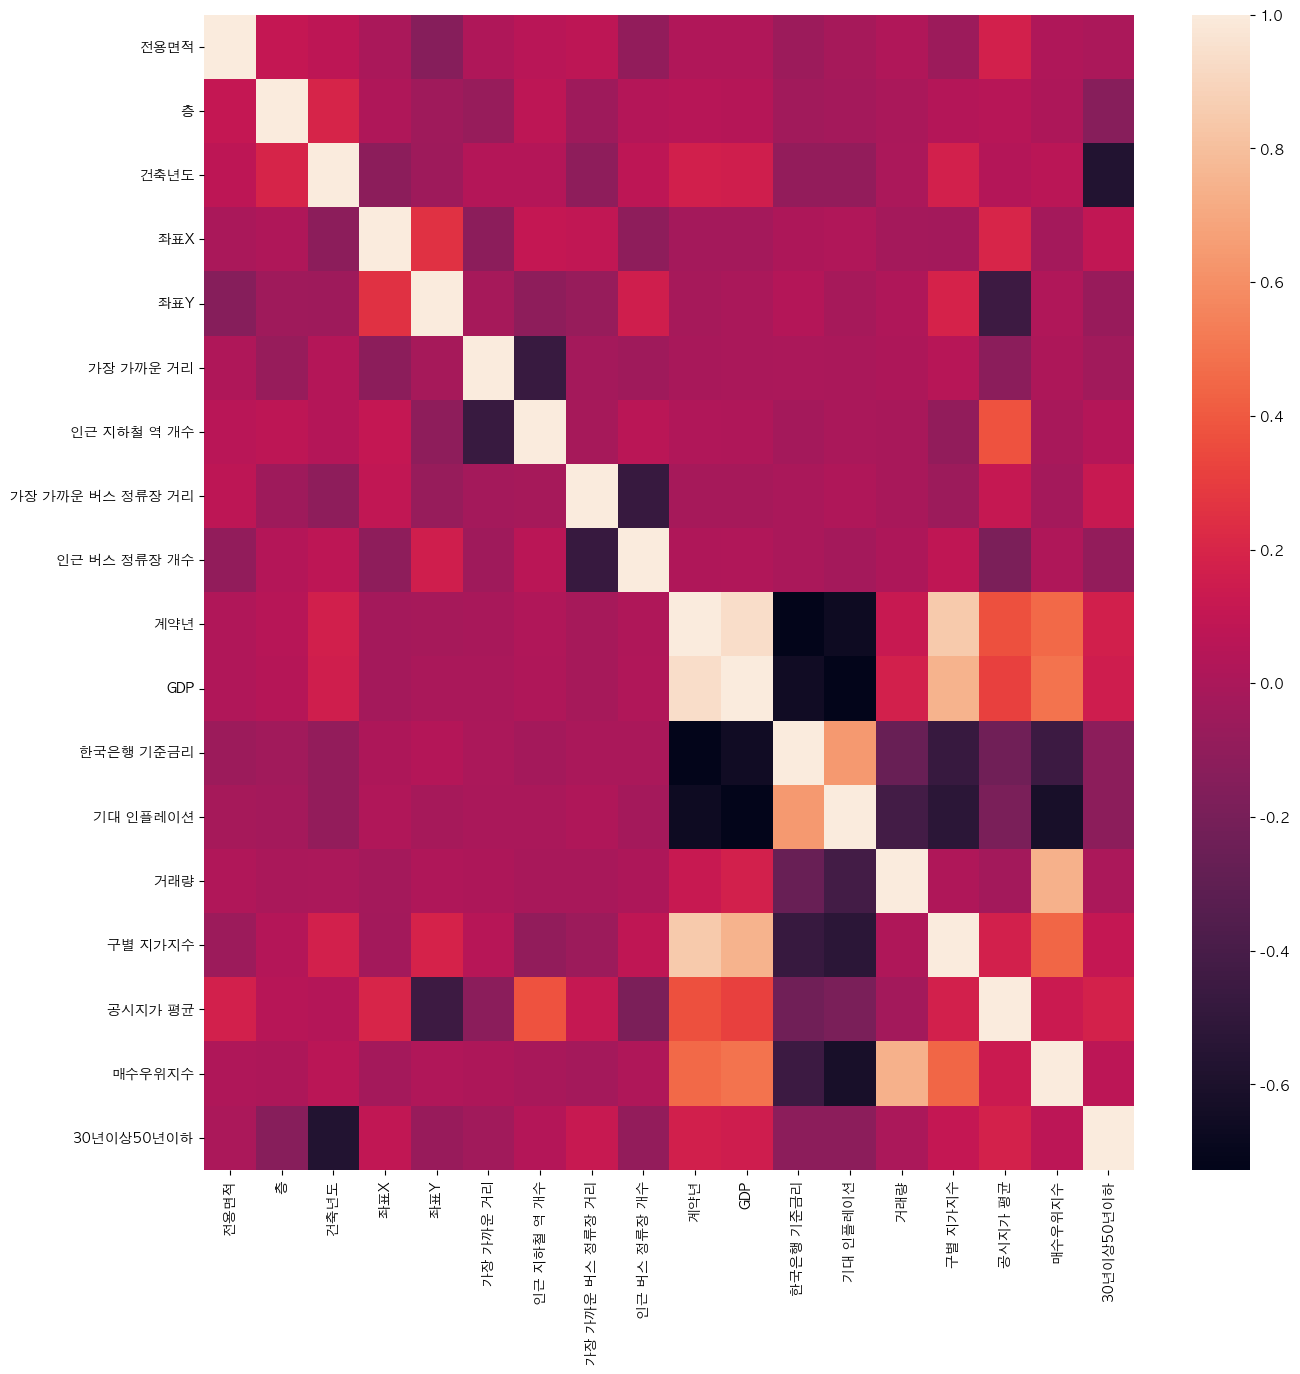

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)
plt.show()

In [18]:
tmp = numeric_df[['전용면적', '층', '건축년도', '좌표X', '좌표Y', '가장 가까운 거리', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리', '인근 버스 정류장 개수', '계약년', 'GDP', '한국은행 기준금리', '기대 인플레이션', '거래량', '구별 지가지수', '공시지가 평균', '매수우위지수', '30년이상50년이하']]

In [20]:
tmp['건물나이'] = (tmp['계약년'] - tmp['건축년도'])**2

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_89610/417340147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['건물나이'] = (tmp['계약년'] - tmp['건축년도'])**2


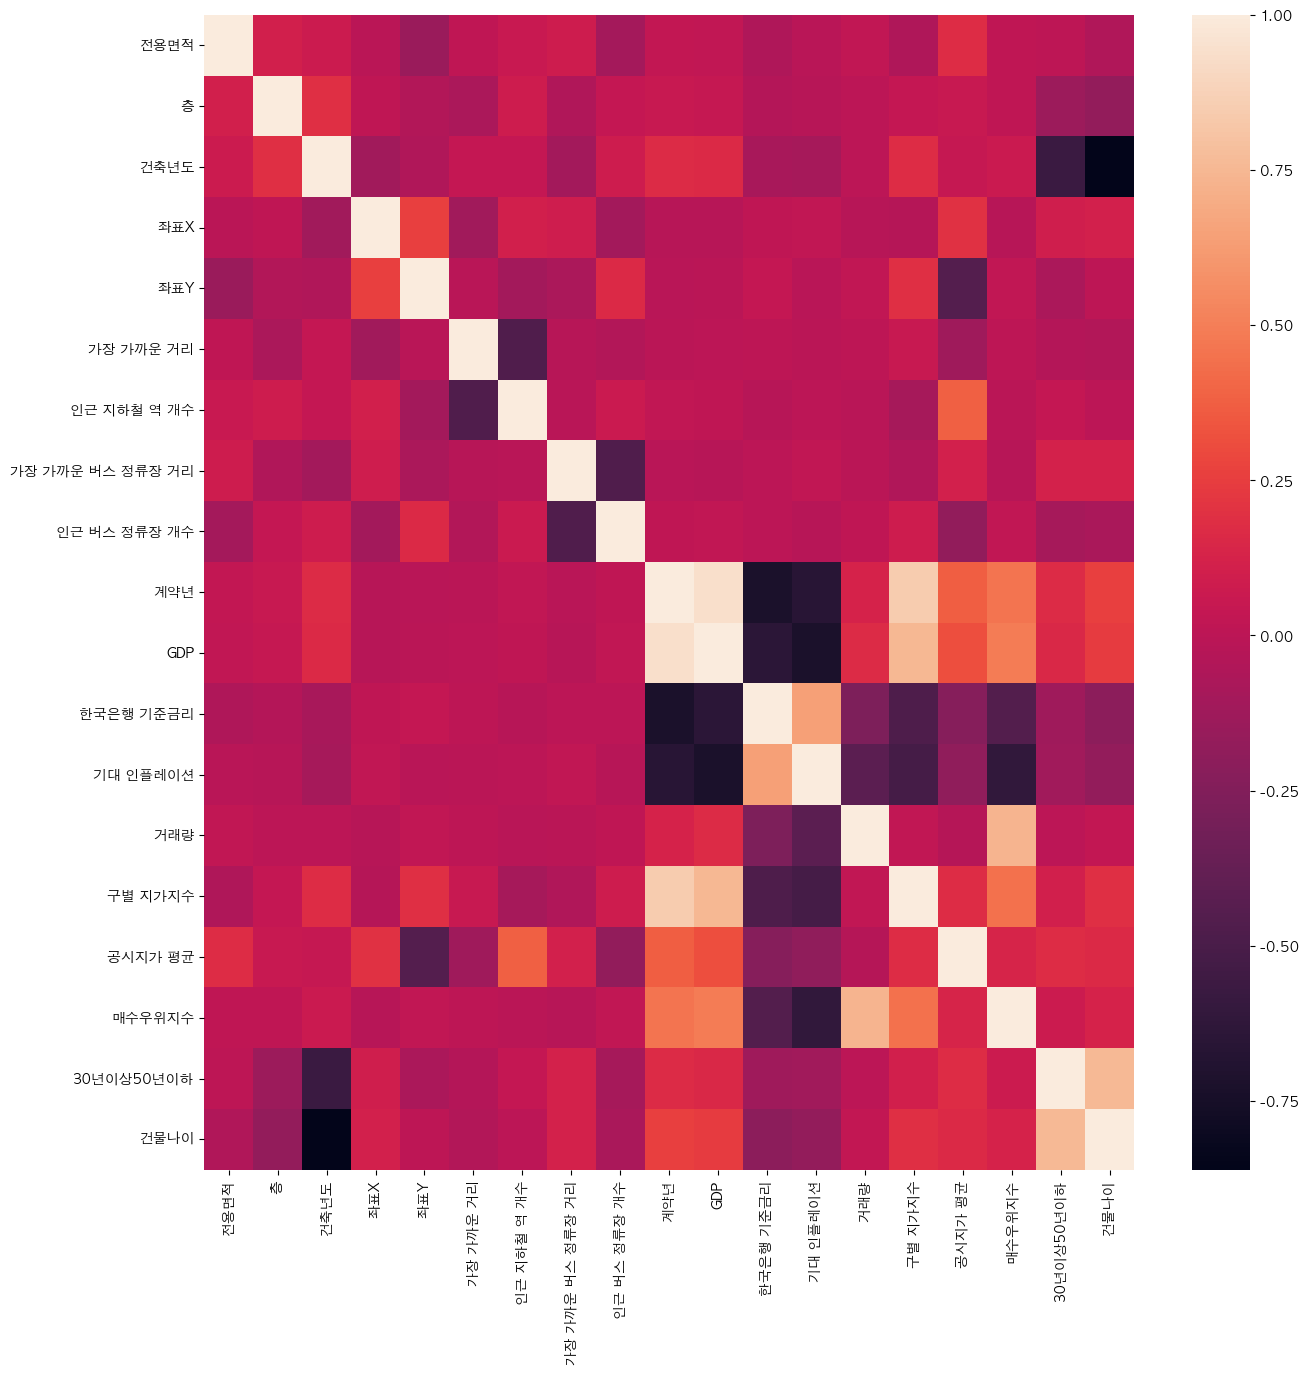

In [21]:
corr_matrix = tmp.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)
plt.show()